In [1]:
import zipfile
with zipfile.ZipFile('Data/mnist.zip') as zip_ref:
    zip_ref.extractall('Data/')

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home='Data/', as_frame = False)
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
import numpy as np
x, y = mnist['data'], mnist['target']
y = y.astype(np.int64)
print(x.shape, y.shape)

(70000, 784) (70000,)


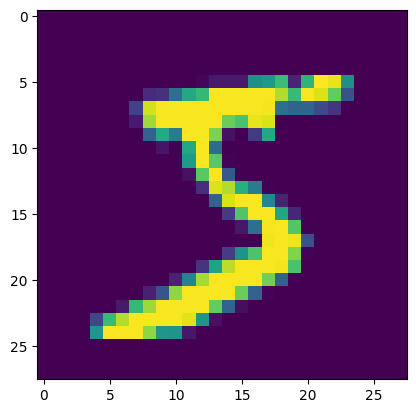

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x[0].reshape(28,28))
plt.show()

In [5]:
x_tr, x_ts, y_tr, y_ts = x[:60000], x[60000:], y[:60000], y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
x_tr, y_tr = x_tr[shuffle_index], y_tr[shuffle_index]

In [6]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy, dx])
    return shifted_image.reshape([-1])
    

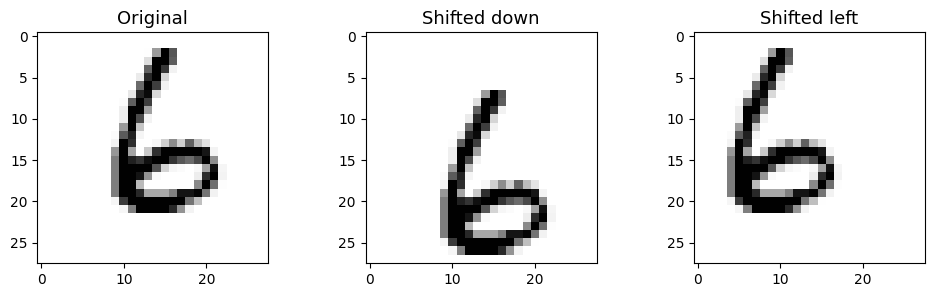

In [7]:
import matplotlib.pyplot as plt
image = x_tr[70]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize = (12,3))
plt.subplot(131)
plt.title('Original', fontsize=13)
plt.imshow(image.reshape(28,28), cmap="Greys")
plt.subplot(132)
plt.title('Shifted down', fontsize=13)
plt.imshow(shifted_image_down.reshape(28,28), cmap="Greys")
plt.subplot(133)
plt.title('Shifted left', fontsize=13)
plt.imshow(shifted_image_left.reshape(28,28), cmap="Greys")
plt.show()

In [8]:
x_tr_aug = [image for image in x_tr]
y_tr_aug = [label for label in y_tr]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
    for image, label in zip(x_tr, y_tr):
        x_tr_aug.append(shift_image(image, dx, dy))
        y_tr_aug.append(label)

x_tr_aug = np.array(x_tr_aug)
y_tr_aug = np.array(y_tr_aug)

In [9]:
shuffle_idx = np.random.permutation(len(x_tr_aug))
x_tr_aug = x_tr_aug[shuffle_idx]
y_tr_aug = y_tr_aug[shuffle_idx]

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(x_tr_aug[:1000], y_tr_aug[:1000])

KNeighborsClassifier(n_neighbors=1)

In [12]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(x_ts[:1000])
accuracy_score(y_ts[:1000], y_pred[:1000])

0.821